## Portfolio Project # 2
### Rohingya Refugees in Cox's Bazar, Bangladesh
### Exploring Hope In The Rohingya Survey 2019
##### http://xchange.org/reports/TheRohingyaSurvey2019.html
##### https://microdata.unhcr.org/index.php/catalog/434/study-description
##### https://data.humdata.org/dataset/the-rohingya-survey-2019-march-april-2019

Xchange conducted a survey of the perceptions of new adult arrivals to Rohingya refugee camps in Cox's Bazaar, Bangladesh after the August 2017 military operations in Rakhine State, Myanmar. The goals for this analysis were to utilize Python libraries to explore real world data, generate descriptive statistics and visuals, and to use machine learning (ML) algorithms to assess which survey features are strong predictors of hope expresesed at the very end of the survey. The data was from 2019 and was downloaded on 2021-12-06 in .xlsx format from the third hyperlink above.

Feature engineering focused on selecting and transforming columns that are compatible with ML algorithms, i.e. after data cleaning, the data is coded from strings to ordinal integers where applicable and then normalized. The rest of the features were one-hot encoded. Where possible, GridSearchCV was used to search for optimal hyperparameters.

The scikit-learn machine algorithms that are explored (sklearn calls are in parenthesis):<br/>
Support Vector Classifier (SVC)<br/>
K-Nearest Neighbors Classifier (KNeighborsClassifier)<br/>
Logistic Regression (LogisticRegression) - did not work<br/>
Naive Bayes Classifier (MultinomialNB)<br/>
Decision Tree Classifier (DecisionTreeClassifier) - implemented with default parameters as well as pruned leaf nodes, max depth and entropy<br/>
Random Forest Classifier (RandomForestClassifier)<br/>
Ada Boost Classifier (AdaBoostClassifier)<br/>
Gradient Boosting Classifier (GradientBoostingClassifier)<br/>

The three ML algorithms that performed the best were:<br/>
Support Vector Classifier (80% accuracy)<br/>
Random Forest Classifier with default parameters (79% accuracy)<br/>
Gradient Boosting Classifier (80% accuracy)

The 5 most important features found from the Gradient Boosting Classifier were:
                                            
                                                                      Feature Importance

    Other than family, who do you go to when you have a problem?_Block Majhi	0.373033

    To what extent do you feel at home in the camp in Bangladesh now?	0.346728

    How satisfied are you with the level of social support you and your family receive from neighbours and friends?	0.121291

    Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?_No	0.050930

    How satisfied are you with the level of psychological support you and your family are receiving in the camp?	0.023207

Without having domain experience, it seems that strong societal support (vs. only social) is a recurring theme in the features above and contributes significantly towards levels of hope expressed in the target variable.

Skills: Python; Pandas; Numpy; Matplotlib; Seaborn; Data Munging; Feature Engineering; Machine Learning Algorithms, Grid Search & Cross Validation, and Model Performance Evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# renamed the xlsx file after download for my own convenience
# original file name is: xchange-foundation-the-rohingya-survey-2019-data.xlsx
# https://data.humdata.org/dataset/the-rohingya-survey-2019-march-april-2019

df = pd.read_excel(
    'Project2_xchange-foundation-the-rohingya-survey-2019-data.xlsx', 
    sheet_name='2019-Rohingya-Survey', header=0)
df.head(3)

,Row ID,Sex,How satisfied are you with the amount of space allocated to you and your family in the camp?,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,How satisfied are you with the level of psychological support you and your family are receiving in the camp?,How satisfied are you with the level of social support you and your family receive from neighbours and friends?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",...,"If the Myanmar government recognizes the rights of Rohingya in the next two years, will you return to Myanmar?",Do you think that repatriation to Myanmar will happen in the next two years?,Do you personally know any Rohingya who left Bangladesh in the last six months?,Where did they go?,Have you thought about leaving to go to another country other than Myanmar and Bangladesh?,How scared are you to leave for another country?,Where do you think you will be in six months from now?,"If you could choose any country in the world, other than Myanmar, where would you go?",Where do you think the majority of Rohingya would choose to go if they could choose freely (apart from Myanmar)?,How do you feel about the future?
0,11584,Female,Unsatisfied,Satisfied,Yes,Unsatisfied,Unsatisfied,Satisfied,Yes,Very satisfied,...,Yes,No,Yes,Malaysia,Yes,very scared,Can't imagine/I am not sure where I will be,Canada,USA,positive
1,11585,Female,Unsatisfied,Satisfied,Yes,Neither satisfied nor unsatisfied,Satisfied,Unsatisfied,Yes,Very satisfied,...,Yes,No,No,NaN,No,very scared,Can't imagine/I am not sure where I will be,Saudi Arabia,Canada,NaN
2,11586,Female,Satisfied,Unsatisfied,Yes,Unsatisfied,Satisfied,Very satisfied,Yes,Very satisfied,...,Yes,No,Yes,Malaysia,No,very scared,Can't imagine/I am not sure where I will be,Australia,Canada,positive


In [2]:
df.shape

(1277, 71)

In [3]:
# EDA - Display all column headers fully for ease of further data munging.
# Commenting out for ease of readability on GitHub.

# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
# pd.DataFrame(df.columns)

In [4]:
# df.info()

In [5]:
# EDA - Display which columns have NaN entries:
# pd.DataFrame(df.columns[df.isna().any()])

In [6]:
# EDA - quick dataframe showing columns as df columns as index and sum of NaN ...
# and non-NaN values:

pd.set_option('display.max_rows', None)
print('Number of rows in the data file:', len(df), '\n')
notna_isna = pd.DataFrame(columns=['Columns', 'notna_count', 'isna_count'])
notna_isna['Columns'] = df.columns
notna_isna['notna_count'] = list(df.notna().sum())
notna_isna['isna_count'] = list(df.isna().sum())
notna_isna.set_index('Columns', inplace=True)
print('For each column, find the number of values present and values missing:', '\n')
notna_isna.sort_values('isna_count', ascending=False)

Number of rows in the data file: 1277 

For each column, find the number of values present and values missing: 



,notna_count,isna_count
Columns,,
In what countries are they now?.1,4,1273
Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?,8,1269
Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,14,1263
Where did they go?,17,1260
Have you ever seen any Rohingya in the camp use medicine or syrup often without needing it?,22,1255
Did you also smoke before coming to Bangladesh?,252,1025
How many cigarettes a day on average?,252,1025
Where does sexual harassment happen the most?,346,931
In what countries are they now?,686,591


In [7]:
# Strip any leading or trailing whitespace in column names:
df.rename(columns=lambda x: x.strip(), inplace=True)

# Drop rows within columns with a few NaN values:
columns_nans = ['Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?',
                'How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?',
                'Other than family, who do you go to when you have a problem?',
                'How much do you trust the Majhis?',
                'How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?',
                'Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?',
                'Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?',
                'Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?',
                'Do you know that the Bangladesh government plans on moving Rohingya to Bhasan Char?',
                'Are you willing to go?',
                'Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?',
                'Do you personally know any Rohingya who left Bangladesh in the last six months?',
                'How do you feel about the future?']
df1 = df.dropna(subset=columns_nans)
df1.shape

(1117, 71)

In [8]:
# Drop columns that have significant NaN values and column 'Row ID' which is a unique ...
# identifier fo reach respondent but perhaps incompatible with the ML process:

columns_drop = ['Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?',
                'In what countries are they now?',
                'In what countries are they now?.1',
                'Have you  ever seen any Rohingya in the camp use medicine or syrup often without needing it?', #extra space between 'you' and 'ever' wasn't being picked up until copying exactly from df1.columns
                'Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?',
                'Where does sexual harassment happen the most?',
                'Where did they go?', 'Row ID']

df1 = df1.drop(labels=columns_drop, axis=1)
df1.shape

(1117, 63)

In [9]:
# Drop columns regarding resettlement countries of choice since it would be ...
# difficult to encode to find the signal for hope:

columns_drop = ['If you could choose any country in the world, other than Myanmar, where would you go?',
                'Where do you think the majority of Rohingya would choose to go if they could choose freely (apart from Myanmar)?']
df1 = df1.drop(labels=columns_drop, axis=1)
df1.shape

(1117, 61)

In [10]:
# Fill in NaN values with zeros for those who don't smoke or chew betel nuts &
# Fill in NaN values with 'No' for those who didn't smoke or chew betel nuts prior:

values = {'How many cigarettes a day on average?': 0, 
          'How many betel nuts a day on average?': 0, 
          'Did you also smoke before coming to Bangladesh?': 'No', 
          'Did you also chew before coming to Bangladesh?': 'No'}
df1.fillna(value=values, axis=0, inplace=True)

In [11]:
# Check for NaNs in new dataframe df1 which is created for ease of debugging
# This code block was used several times when dropping NaN rows and columns above.

pd.set_option('display.max_rows', None)
print('Number of rows in the data file:', len(df1), '\n')
notna_isna = pd.DataFrame(columns=['Columns', 'notna_count', 'isna_count'])
notna_isna['Columns'] = df1.columns
notna_isna['notna_count'] = list(df1.notna().sum())
notna_isna['isna_count'] = list(df1.isna().sum())
notna_isna.set_index('Columns', inplace=True)
print('For each column in df1, find the number of values present and values missing:', '\n')
notna_isna.sort_values(by='isna_count', ascending=False)[:3]
# notna_isna

Number of rows in the data file: 1117 

For each column in df1, find the number of values present and values missing: 



,notna_count,isna_count
Columns,,
Sex,1117,0
Do you prefer solving your problems alone or by asking others for their help?,1117,0
How comfortable do you feel talking about your problems with NGO workers?,1117,0


In [12]:
# A quick look at how many rows have been dropped due to NaN values.
print('Number of total rows dropped thus far:', len(df) - len(df1))
print('Percent of total rows dropped thus far:', np.round(100*(len(df) - len(df1))/len(df),2))
df1.shape

Number of total rows dropped thus far: 160
Percent of total rows dropped thus far: 12.53


(1117, 61)

In [13]:
# For columns dealing with satisfaction, convert to ordinal integers:

dict_satisfy = {"Very unsatisfied": 1, "Unsatisfied": 2, 
                "Neither satisfied nor unsatisfied": 3, 
                "Satisfied": 4, "Very satisfied": 5}

cleanup_satisfy = {"How satisfied are you with the amount of space allocated to you and your family in the camp?": dict_satisfy,
                   "How satisfied are you with the level of hygiene and sanitation in the camp?": dict_satisfy,
                   "How satisfied are you with the quality of healthcare you and your family are receiving in the camp?": dict_satisfy,
                   "How satisfied are you with the level of psychological support you and your family are receiving in the camp?": dict_satisfy,
                   "How satisfied are you with the level of social support you and your family receive from neighbours and friends?": dict_satisfy,
                   "How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?": dict_satisfy,
                   "How satisfied are you with the quality of education you and your family are receiving in the camp?": dict_satisfy,
                   "How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?": dict_satisfy,
                   "How satisfied are you with the income your family makes in the camp?": dict_satisfy,
                   "How satisfied are you with the overall help you and your family have been receiving from NGOs?": dict_satisfy 
                  }

df2 = df1.replace(cleanup_satisfy)
df2.shape

(1117, 61)

In [14]:
# For columns dealing with trust, convert to ordinal integers:

dict_trust = {"No trust at all": 1, "Little trust": 2, 
              "Neither trust nor distrust": 3, 
              "Quite a bit of trust": 4, "A lot of trust": 5}

cleanup_trust = {'How much do you trust the police/military/guards of camps in Bangladesh?': dict_trust,
                 "How much do you trust the NGOs in the camp?": dict_trust,
                 "How much do you trust the Majhis?": dict_trust,
                 "How much do you trust the Imam (religious leader)?": dict_trust
                }

df2 = df2.replace(cleanup_trust)
df2.shape

(1117, 61)

In [15]:
# # For columns dealing with foreign communication frequency, convert to ordinal integers:

dict_comm = {"Never": 1, "Once a year": 2, "Every few months": 3,
             "Once a month": 4, "Three times a month": 5,
             "Once a week": 6, "More than once a week": 7}

cleanup_comm = {'How often do you talk with Rohingya people outside Bangladesh and Myanmar?': dict_comm,
               'How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?': dict_comm}

df2 = df2.replace(cleanup_comm)
df2.shape

(1117, 61)

In [16]:
# For column dealing with comfort level speaking with NGO workers, convert to ordinal integers:

dict_comfort = {"Very uncomfortable": 1, "Uncomfortable": 2, 
                "Neither comfortable nor uncomfortable": 3,
                "Comfortable enough": 4, "Very comfortable": 5}

cleanup_comfort = {'How comfortable do you feel talking about your problems with NGO workers?': dict_comfort}

df2 = df2.replace(cleanup_comfort)
df2.shape

(1117, 61)

In [17]:
# For column dealing with perception of camp improvement, convert to ordinal integers:

dict_camp = {"six months ago": 1, "same-nothing has changed": 2, "now": 3}

cleanup_camp = {'Do you think the situation in the camp is better now or 6 months ago?': dict_camp}

df2 = df2.replace(cleanup_camp)
df2.shape

(1117, 61)

In [18]:
# For column dealing with frequency of news of violence, convert to ordinal integers:

dict_violence = {"A few times a week": 1, "A few times a month": 2, 
                 "A few times a year": 3, "Never": 4}

cleanup_violence = {'How often do you hear people talking about violent groups in the camp?': dict_violence}

df2 = df2.replace(cleanup_violence)
df2.shape

(1117, 61)

In [19]:
# For column dealing with violence over time, convert to ordinal integers:

dict_violence2 = {"Increased a lot": 1, "Increased": 2, "Same": 3,
                 "Decreased": 4, "Decreased a lot": 5}

cleanup_violence2 = {'How do you think violence in the camp has changed over time?': dict_violence2}

df2 = df2.replace(cleanup_violence2)
df2.shape

(1117, 61)

In [20]:
# For column dealing with fear of leaving child unattended, convert to ordinal integers:
"""Ordinally, I placed 'I don't have children' closer to not afraid which may be a bit
of a stretch since the research question does not further clarify if one has a
general fear of children being left unattended after dark as a metric of safety.
"""
dict_child = {"Very afraid": 1, "Afraid": 2, 
              "I don't have children - does not apply": 3, "Not afraid": 4}

cleanup_child = {'How afraid are you to leave your child unattended in the camp after it gets dark?': dict_child}

df2 = df2.replace(cleanup_child)
df2.shape

(1117, 61)

In [21]:
# For column dealing with feeling at home in Bangladesh, convert to ordinal integers:

dict_home = {"Not at all": 1, "Very little": 2, 
             "Somewhat": 3, "To a great extent": 4}

cleanup_home = {'To what extent do you feel at home in the camp in Bangladesh now?': dict_home}

df2 = df2.replace(cleanup_home)
df2.shape

(1117, 61)

In [22]:
# For column dealing with fear of leaving for another country, convert to ordinal integers:

dict_depart = {"very scared": 1, "scared": 2, 
               "neither scared nor not scared": 3, "not scared": 4,
               "not at all scared": 5}

cleanup_depart = {'How scared are you to leave for another country?': dict_depart}

df2 = df2.replace(cleanup_depart)
df2.shape

(1117, 61)

In [23]:
# For column dealing with where respondent will be 6 months from now, convert to ordinal integers:
# This encoding is somewhat arbitrary and assumes that the signal for hope is in ...
# resettlment in Myanmar, another country or Malaysia.

dict_6months = {"Here, in the camp ": 1, "Bhasan Char": 1,         #note extra space after camp
                "Depends on what the government will decide": 1, 
                "Can't imagine/I am not sure where I will be": 1, 
                "Depends on luck":1, "No reply/No comment": 1, "Allah knows": 1,
                "Another (peaceful) place/country": 2,
                "Malaysia": 2, "Myanmar/Motherland": 2}

cleanup_6months = {'Where do you think you will be in six months from now?': dict_6months}

df2 = df2.replace(cleanup_6months)
df2.shape

(1117, 61)

In [24]:
# What are the unique variables in the target column we are trying to predict (quality)?

df1['How do you feel about the future?'].unique()

array(['very positive', 'positive', 'neither positive nor negative',
       'negative', 'very negative'], dtype=object)

In [25]:
# For target column dealing with hope, convert to ordinal integers:

dict_hope = {"very negative": 1, "negative": 2, 
             "neither positive nor negative": 3, 
             "positive": 4, "very positive": 5}

cleanup_hope = {'How do you feel about the future?': dict_hope}

df2 = df2.replace(cleanup_hope)
df2 = df2.reset_index(drop=True)
df2.shape

(1117, 61)

In [26]:
# One hot encode non-ordinal categorical columns:
# In hindsight, it would have been more Pythonic / efficient to use ...
# df2_object = df2.select_dtypes(include='object')

df_encode = df2[['Sex',
                 'Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?',
                 'Do you think you are able to exercise your religion freely in the camp?',
                 'Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?',
                 'Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?',
                 'Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?',
                 'How do you mostly hear about the news?',
                 'Who do you consider the most important person in your camp?',
                 'Other than family, who do you go to when you have a problem?',
                 'Do you have enough good friends in the camp?',
                 'Do you consider any Bangladeshis as your friends?',
                 'Do you believe Rohingya and Bangladeshis can be good friends?',
                 'Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?',
                 'Do you often feel stressed or overwhelmed by your situation?',
                 'Do you prefer talking about your problems with others or trying to forget what you are going through?',
                 'Do you prefer solving your problems alone or by asking others for their help?',
                 'Does talking about your every day problems with others make you feel better?',
                 'Do you smoke cigarettes?',
                 'Did you also smoke before coming to Bangladesh?',
                 'Do you chew betel nuts?',
                 'Did you also chew before coming to Bangladesh?',
                 'Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?',
                 'Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?',
                 'Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?',
                 'Do you think that sexual harassment in the camp happens often?',
                 'Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?',
                 'Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?',
                 'Do you know that the Bangladesh government plans on moving Rohingya to Bhasan Char?',
                 'Are you willing to go?',
                 'Do you think that the government of Myanmar will recognize the rights of Rohingya in the next two years?',
                 'If the Myanmar government recognizes the rights of Rohingya in the next two years, will you return to Myanmar?',
                 'Do you think that repatriation to Myanmar will happen in the next two years?',
                 'Do you personally know any Rohingya who left Bangladesh in the last six months?',
                 'Have you thought about leaving to go to another country other than Myanmar and Bangladesh?']]

df_dummies = pd.get_dummies(df_encode, drop_first=True)
df_dummies.head(3)

,Sex_Male,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?_Yes",Do you think you are able to exercise your religion freely in the camp?_Yes,Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?_Yes,Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?_Yes,Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?_Yes,How do you mostly hear about the news?_Friends and neighbours,How do you mostly hear about the news?_Newspaper or magazines,How do you mostly hear about the news?_Radio,"How do you mostly hear about the news?_Social media (e.g. Facebook, Twitter, Instagram)",...,Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?_Yes,Do you think that sexual harassment in the camp happens often?_No,Do you think that sexual harassment in the camp happens often?_Yes,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?_Yes,Are you willing to go?_Yes,Do you think that the government of Myanmar will recognize the rights of Rohingya in the next two years?_Yes,"If the Myanmar government recognizes the rights of Rohingya in the next two years, will you return to Myanmar?_Yes",Do you think that repatriation to Myanmar will happen in the next two years?_Yes,Do you personally know any Rohingya who left Bangladesh in the last six months?_Yes,Have you thought about leaving to go to another country other than Myanmar and Bangladesh?_Yes
0,0,0,1,1,0,0,1,0,0,0,...,1,0,1,1,1,0,1,0,1,0
1,0,1,1,1,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,0,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [27]:
df_dummies.shape

(1117, 55)

In [28]:
# Seperate out non-ordinal categorical columns to prep for MinMaxScaler:

df2_numeric = df2.select_dtypes(exclude='object')

In [29]:
df2_numeric.head()

,How satisfied are you with the amount of space allocated to you and your family in the camp?,How satisfied are you with the level of hygiene and sanitation in the camp?,How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,How satisfied are you with the level of psychological support you and your family are receiving in the camp?,How satisfied are you with the level of social support you and your family receive from neighbours and friends?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How satisfied are you with the overall help you and your family have been receiving from NGOs?,...,How comfortable do you feel talking about your problems with NGO workers?,Do you think the situation in the camp is better now or 6 months ago?,How many cigarettes a day on average?,How many betel nuts a day on average?,How often do you hear people talking about violent groups in the camp?,How do you think violence in the camp has changed over time?,How afraid are you to leave your child unattended in the camp after it gets dark?,To what extent do you feel at home in the camp in Bangladesh now?,How scared are you to leave for another country?,How do you feel about the future?
0,4,2,1,5,5,5,2,1,2,4,...,4,2,0.0,3.0,2,4,1,2,1,5
1,2,2,2,4,5,5,2,2,1,2,...,4,2,0.0,5.0,2,3,3,2,2,5
2,2,5,4,2,3,5,1,4,2,2,...,5,2,0.0,3.0,3,5,1,2,1,4
3,2,4,1,4,5,5,2,2,2,4,...,4,2,0.0,20.0,4,5,2,2,1,5
4,4,4,2,5,4,5,4,2,2,4,...,5,2,0.0,0.0,4,4,4,4,2,4


In [30]:
# Cannot apply MinMaxScaler to target column else models will throw errors ...
# for finding continuous values in the categorical target.
df2_ohe = df2_numeric.loc[:, df2_numeric.columns != 'How do you feel about the future?']

col_names = list(df2_ohe.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2_mm = scaler.fit_transform(df2_ohe)
df2_mm = pd.DataFrame(df2_mm, columns=col_names)
df2_mm.head(3)

,How satisfied are you with the amount of space allocated to you and your family in the camp?,How satisfied are you with the level of hygiene and sanitation in the camp?,How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,How satisfied are you with the level of psychological support you and your family are receiving in the camp?,How satisfied are you with the level of social support you and your family receive from neighbours and friends?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How satisfied are you with the overall help you and your family have been receiving from NGOs?,...,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How comfortable do you feel talking about your problems with NGO workers?,Do you think the situation in the camp is better now or 6 months ago?,How many cigarettes a day on average?,How many betel nuts a day on average?,How often do you hear people talking about violent groups in the camp?,How do you think violence in the camp has changed over time?,How afraid are you to leave your child unattended in the camp after it gets dark?,To what extent do you feel at home in the camp in Bangladesh now?,How scared are you to leave for another country?
0,0.75,0.0,0.00,1.00,1.0,1.0,0.25,0.000000,0.25,0.666667,...,0.0,0.75,0.5,0.0,0.15,0.333333,0.75,0.000000,0.333333,0.00
1,0.25,0.0,0.25,0.75,1.0,1.0,0.25,0.333333,0.00,0.000000,...,0.0,0.75,0.5,0.0,0.25,0.333333,0.50,0.666667,0.333333,0.25
2,0.25,1.0,0.75,0.25,0.5,1.0,0.00,1.000000,0.25,0.000000,...,0.0,1.00,0.5,0.0,0.15,0.666667,1.00,0.000000,0.333333,0.00


In [31]:
df3 = pd.concat([df2_mm, df_dummies,
                df2_numeric['How do you feel about the future?']], axis=1)
df3.shape

(1117, 81)

In [32]:
df3.head(3)

,How satisfied are you with the amount of space allocated to you and your family in the camp?,How satisfied are you with the level of hygiene and sanitation in the camp?,How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,How satisfied are you with the level of psychological support you and your family are receiving in the camp?,How satisfied are you with the level of social support you and your family receive from neighbours and friends?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How satisfied are you with the overall help you and your family have been receiving from NGOs?,...,Do you think that sexual harassment in the camp happens often?_No,Do you think that sexual harassment in the camp happens often?_Yes,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?_Yes,Are you willing to go?_Yes,Do you think that the government of Myanmar will recognize the rights of Rohingya in the next two years?_Yes,"If the Myanmar government recognizes the rights of Rohingya in the next two years, will you return to Myanmar?_Yes",Do you think that repatriation to Myanmar will happen in the next two years?_Yes,Do you personally know any Rohingya who left Bangladesh in the last six months?_Yes,Have you thought about leaving to go to another country other than Myanmar and Bangladesh?_Yes,How do you feel about the future?
0,0.75,0.0,0.00,1.00,1.0,1.0,0.25,0.000000,0.25,0.666667,...,0,1,1,1,0,1,0,1,0,5
1,0.25,0.0,0.25,0.75,1.0,1.0,0.25,0.333333,0.00,0.000000,...,0,1,0,0,0,0,0,0,1,5
2,0.25,1.0,0.75,0.25,0.5,1.0,0.00,1.000000,0.25,0.000000,...,0,1,0,0,0,1,0,0,0,4


In [33]:
# Check to ensure target column has been appended and not scaled.

sorted(list(df3['How do you feel about the future?'].unique()))

[1, 2, 3, 4, 5]

In [34]:
# Check for NaNs in new dataframe df1 which is created for ease of debugging
# This code block was used several times when dropping NaN rows and columns above.

pd.set_option('display.max_rows', None)
print('Number of rows in the data file:', len(df1), '\n')
notna_isna = pd.DataFrame(columns=['Columns', 'notna_count', 'isna_count'])
notna_isna['Columns'] = df3.columns
notna_isna['notna_count'] = list(df3.notna().sum())
notna_isna['isna_count'] = list(df3.isna().sum())
notna_isna.set_index('Columns', inplace=True)
print('For each column in df3, find the number of values present and values missing:', '\n')
notna_isna.sort_values(by='isna_count', ascending=False)[:3]

Number of rows in the data file: 1117 

For each column in df3, find the number of values present and values missing: 



,notna_count,isna_count
Columns,,
How satisfied are you with the amount of space allocated to you and your family in the camp?,1117,0
Who do you consider the most important person in your camp?_Parents,1117,0
Do you prefer solving your problems alone or by asking others for their help?_I solve my problems myself,1117,0


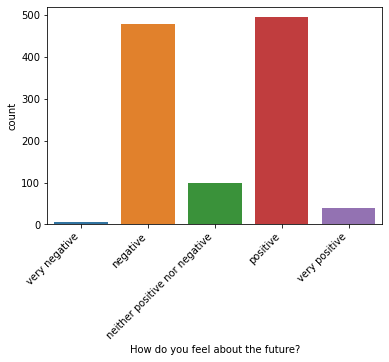

In [35]:
# A quick countplot visual of the target feature to see the distribution ...
# of varying levels of hope.

sns.countplot(data=df3, x='How do you feel about the future?')
plt.xticks(ticks=[0,1,2,3,4], 
           labels=["very negative", "negative", "neither positive nor negative", 
                   "positive", "very positive"],
           rotation=45, ha='right');

#### It's interesting to see the above distribution as being almost even with nearly half feeling negative, half feeling positive and not as many feeling very negative nor very positive.

<AxesSubplot:>

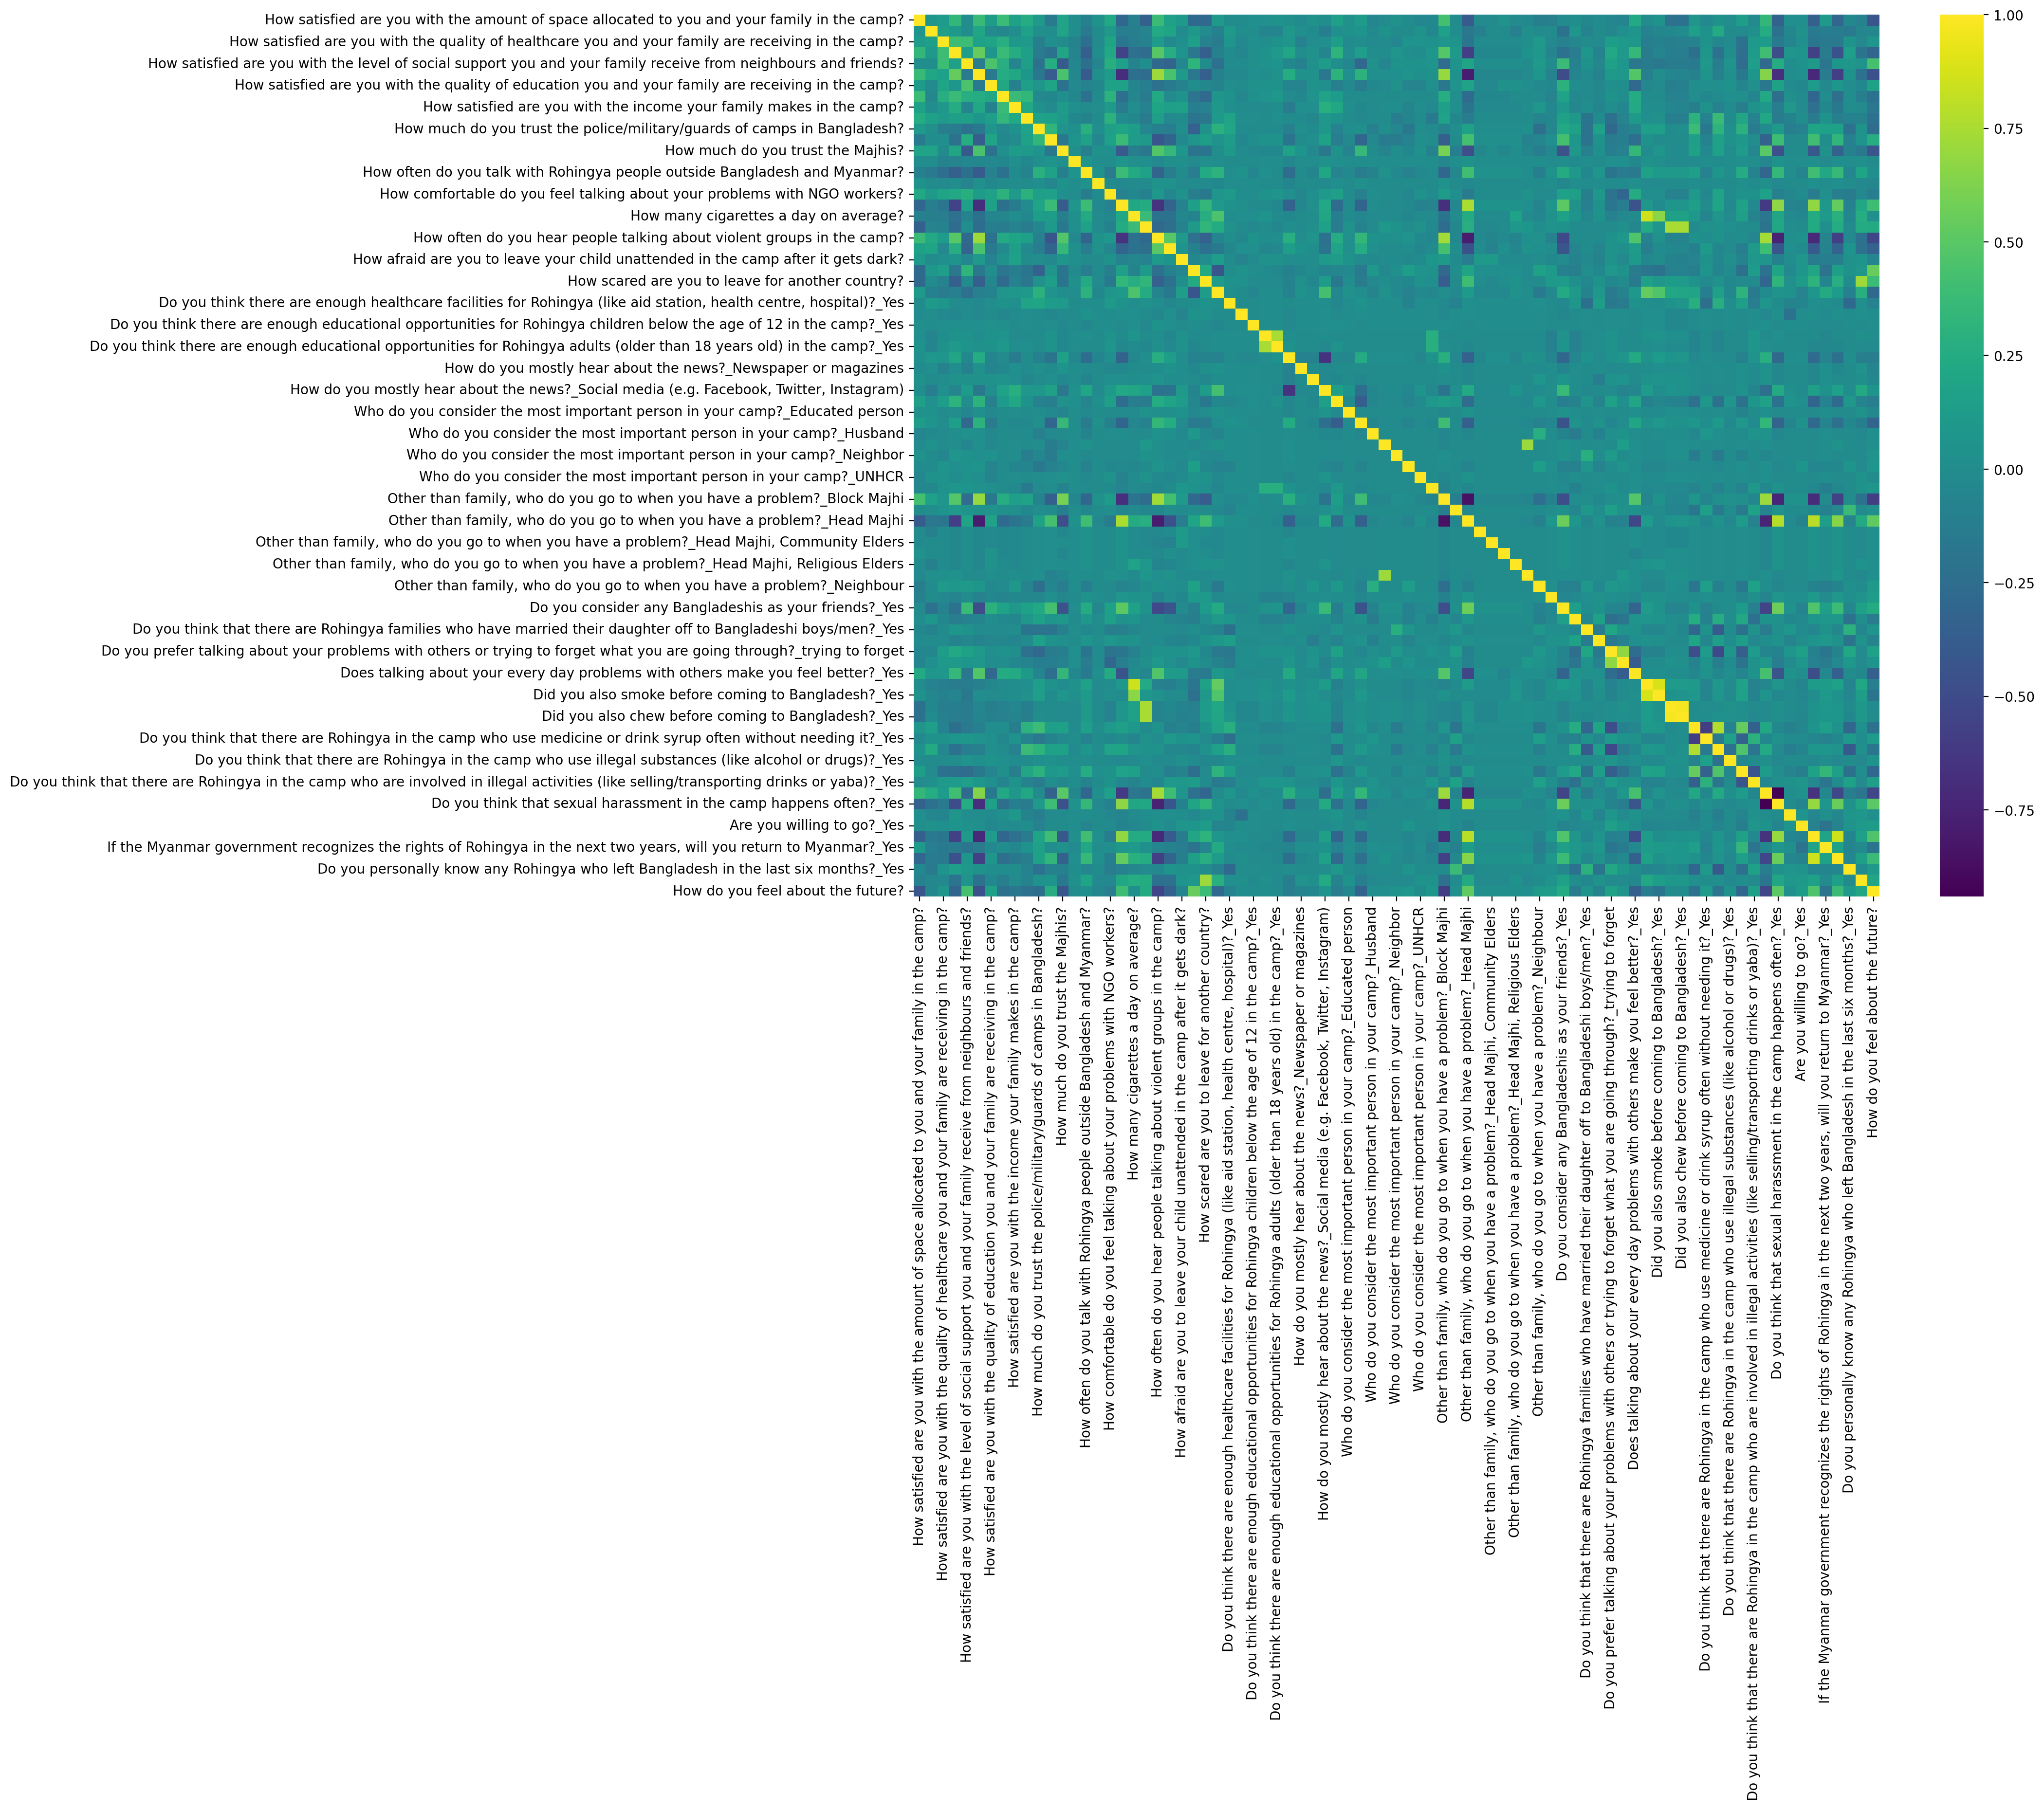

In [36]:
# A Seaborn correlation heatmap to quickly see if strong correlations are present:
plt.figure(figsize=(16,12), dpi=200)
sns.heatmap(df3.corr(), annot=False, cmap='viridis')

In [37]:
# Check which features have stronger relationships with the target variable:
feat_corr = df3.corr()['How do you feel about the future?'].sort_values()[1:-1]
imp_feats = pd.DataFrame(index=feat_corr.index,data=np.array(feat_corr),
                         columns=['Importance'])
imp_feats_pos = imp_feats.loc[(imp_feats['Importance'] > 0.25)]
imp_feats_neg = imp_feats.loc[(imp_feats['Importance'] < -0.25)]
imp_feats = imp_feats_pos.append(imp_feats_neg)
imp_feats.sort_values('Importance')
# There seems to be a few independent variables that are moderately correlated with ...
# the target column.

,Importance
How often do you hear people talking about violent groups in the camp?,-0.539121
Do you think that sexual harassment in the camp happens often?_No,-0.538925
"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",-0.468706
How much do you trust the Majhis?,-0.434823
How satisfied are you with the amount of space allocated to you and your family in the camp?,-0.431676
Does talking about your every day problems with others make you feel better?_Yes,-0.359736
How do you think violence in the camp has changed over time?,-0.342931
Who do you consider the most important person in your camp?_Head Mahji,-0.322235
How satisfied are you with the level of psychological support you and your family are receiving in the camp?,-0.312724
Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?_No,-0.306992


### Comparing a few Machine Learning Algorithms that are multi-class classifiers.
#### Most of the code below is derived from Jose Portilla's Udemy course and customized to suit this study.
See: 2021 Python for Machine Learning & Data Science Masterclass.
https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass

See: Choosing the right estimator scikit-learn algorithm cheat sheet.
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [38]:
X = df3.drop('How do you feel about the future?',axis=1)
y = df3['How do you feel about the future?']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=786)

In [40]:
# StandardScaler was initially used but the model failed to converge even with ...
# maxiter=5000 for Linear SVC. So minmaxscaler was tried as seen earlier.

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X_train)
# scaled_X_train = scaler.transform(X_train)
# scaled_X_test = scaler.transform(X_test)

In [41]:
# Pink warning boxes are suppressed to facilitate ease of readability on Github.
# They are crucial for debuggind and optimizing code and should be turned when ...
# initially running this notebook.

import warnings
warnings.filterwarnings('ignore')

### Support Vector Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [42]:
from sklearn.svm import SVC
svc = SVC(random_state=786)

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1,10,100,1000],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid,cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=786),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto']})

In [45]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale'}

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
preds = grid.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.85      0.93      0.89       148
           3       0.00      0.00      0.00        29
           4       0.73      0.89      0.81       142
           5       0.00      0.00      0.00        14

    accuracy                           0.79       336
   macro avg       0.32      0.37      0.34       336
weighted avg       0.68      0.79      0.73       336



### K-nearest Neighbors Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighbors#sklearn.neighbors.KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,30))}
full_cv_classifier = GridSearchCV(knn,param_grid,cv=4,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [49]:
full_cv_classifier.best_params_

{'n_neighbors': 4}

Text(0, 0.5, 'Accuracy')

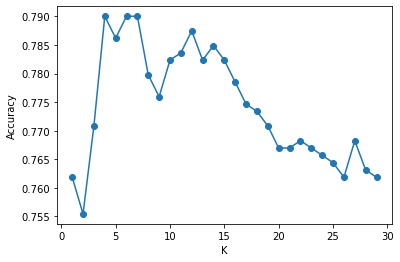

In [50]:
k_values = list(range(1,30))
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [51]:
preds = full_cv_classifier.predict(X_test)
# confusion_matrix(y_test,preds)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.77      0.95      0.85       148
           3       0.36      0.17      0.23        29
           4       0.81      0.80      0.80       142
           5       0.00      0.00      0.00        14

    accuracy                           0.77       336
   macro avg       0.39      0.38      0.38       336
weighted avg       0.71      0.77      0.73       336



### LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression

Results in:
"ConvergenceWarning: The max_iter was reached which means the coef_ did not converge"

In [52]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# log_model = LogisticRegression(solver='saga',multi_class="multinomial",max_iter=500)

# # Penalty Type
# penalty = ['l1', 'l2']

# # Use logarithmically spaced C values (recommended in official docs)
# C = np.logspace(0, 4, 10)

# grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})
# grid_model.fit(X_train,y_train)

### MultinomialNB - Naive Bayes Classifier for multinomial models

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [53]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)
preds = nb.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.71      0.93      0.81       148
           3       0.38      0.31      0.34        29
           4       0.89      0.63      0.74       142
           5       0.32      0.43      0.36        14

    accuracy                           0.72       336
   macro avg       0.46      0.46      0.45       336
weighted avg       0.74      0.72      0.71       336



### Decision Tree Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=786)
dtc.fit(X_train,y_train)
preds = dtc.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.87      0.85      0.86       148
           3       0.23      0.24      0.23        29
           4       0.75      0.79      0.77       142
           5       0.20      0.14      0.17        14

    accuracy                           0.74       336
   macro avg       0.41      0.40      0.41       336
weighted avg       0.73      0.74      0.73       336



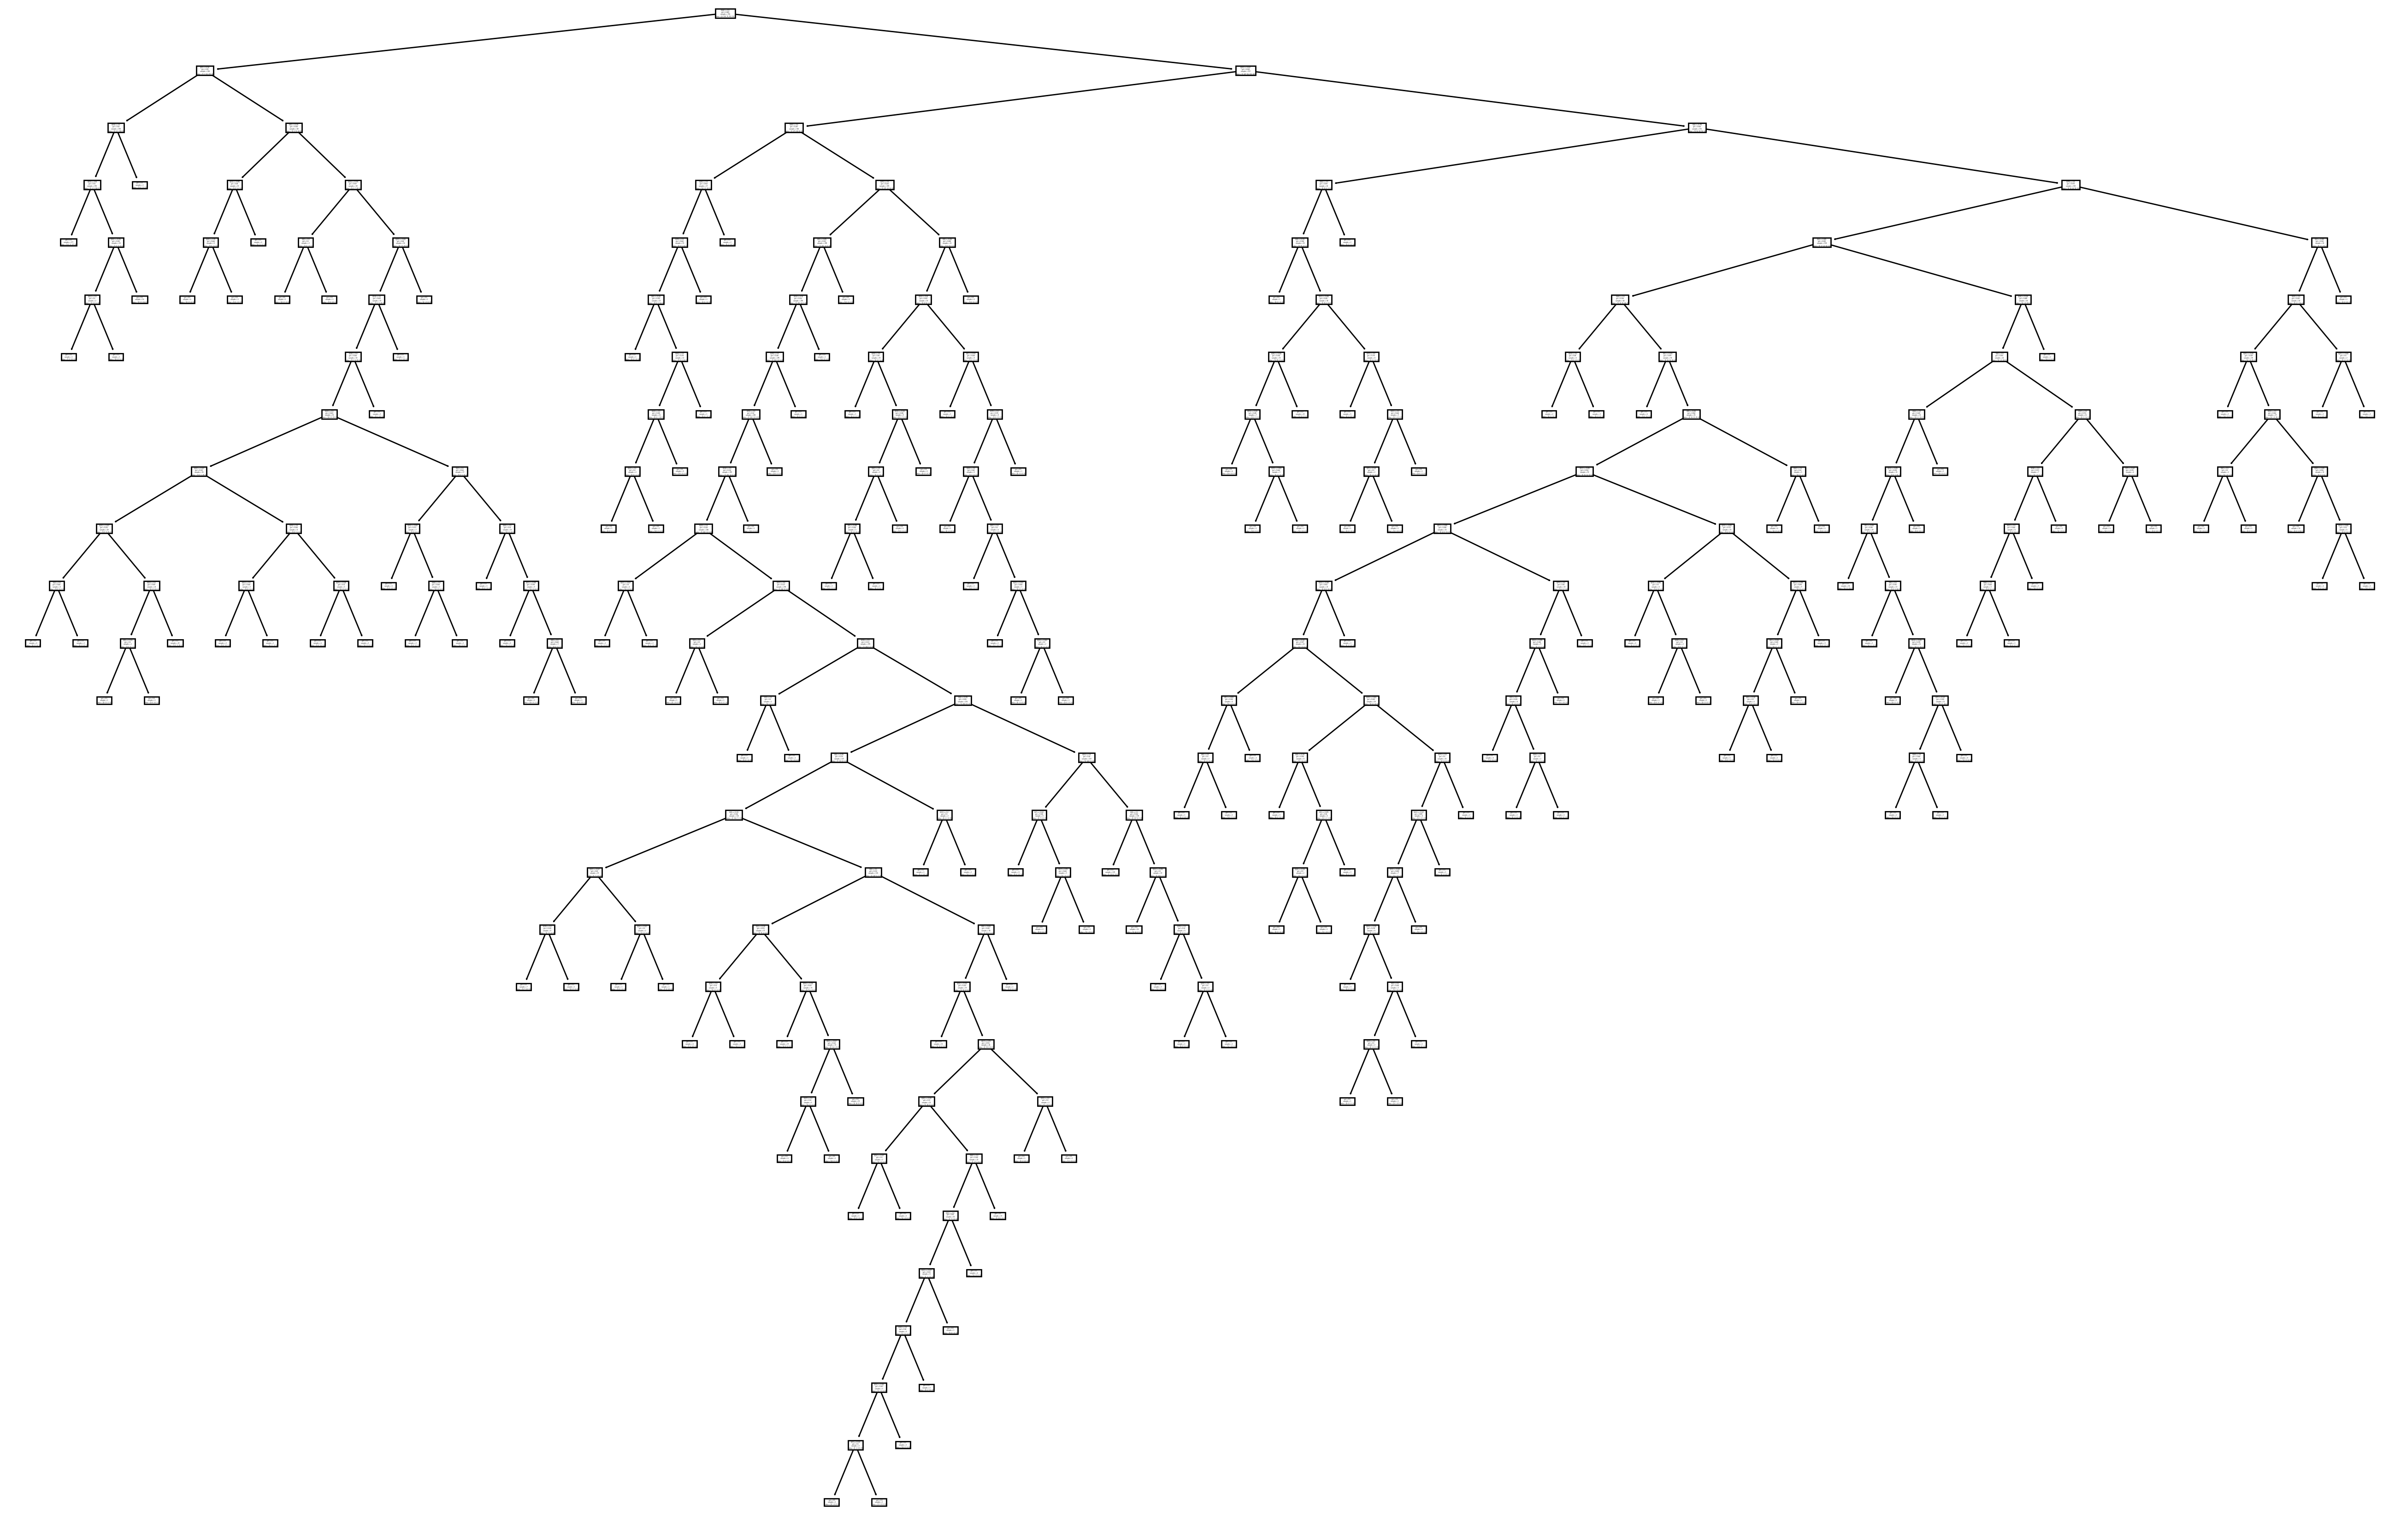

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=200)
plot_tree(dtc);

In [56]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=786)
pruned_tree.fit(X_train,y_train)
preds = pruned_tree.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.89      0.80      0.84       148
           3       0.00      0.00      0.00        29
           4       0.66      0.94      0.78       142
           5       0.00      0.00      0.00        14

    accuracy                           0.75       336
   macro avg       0.31      0.35      0.32       336
weighted avg       0.67      0.75      0.70       336



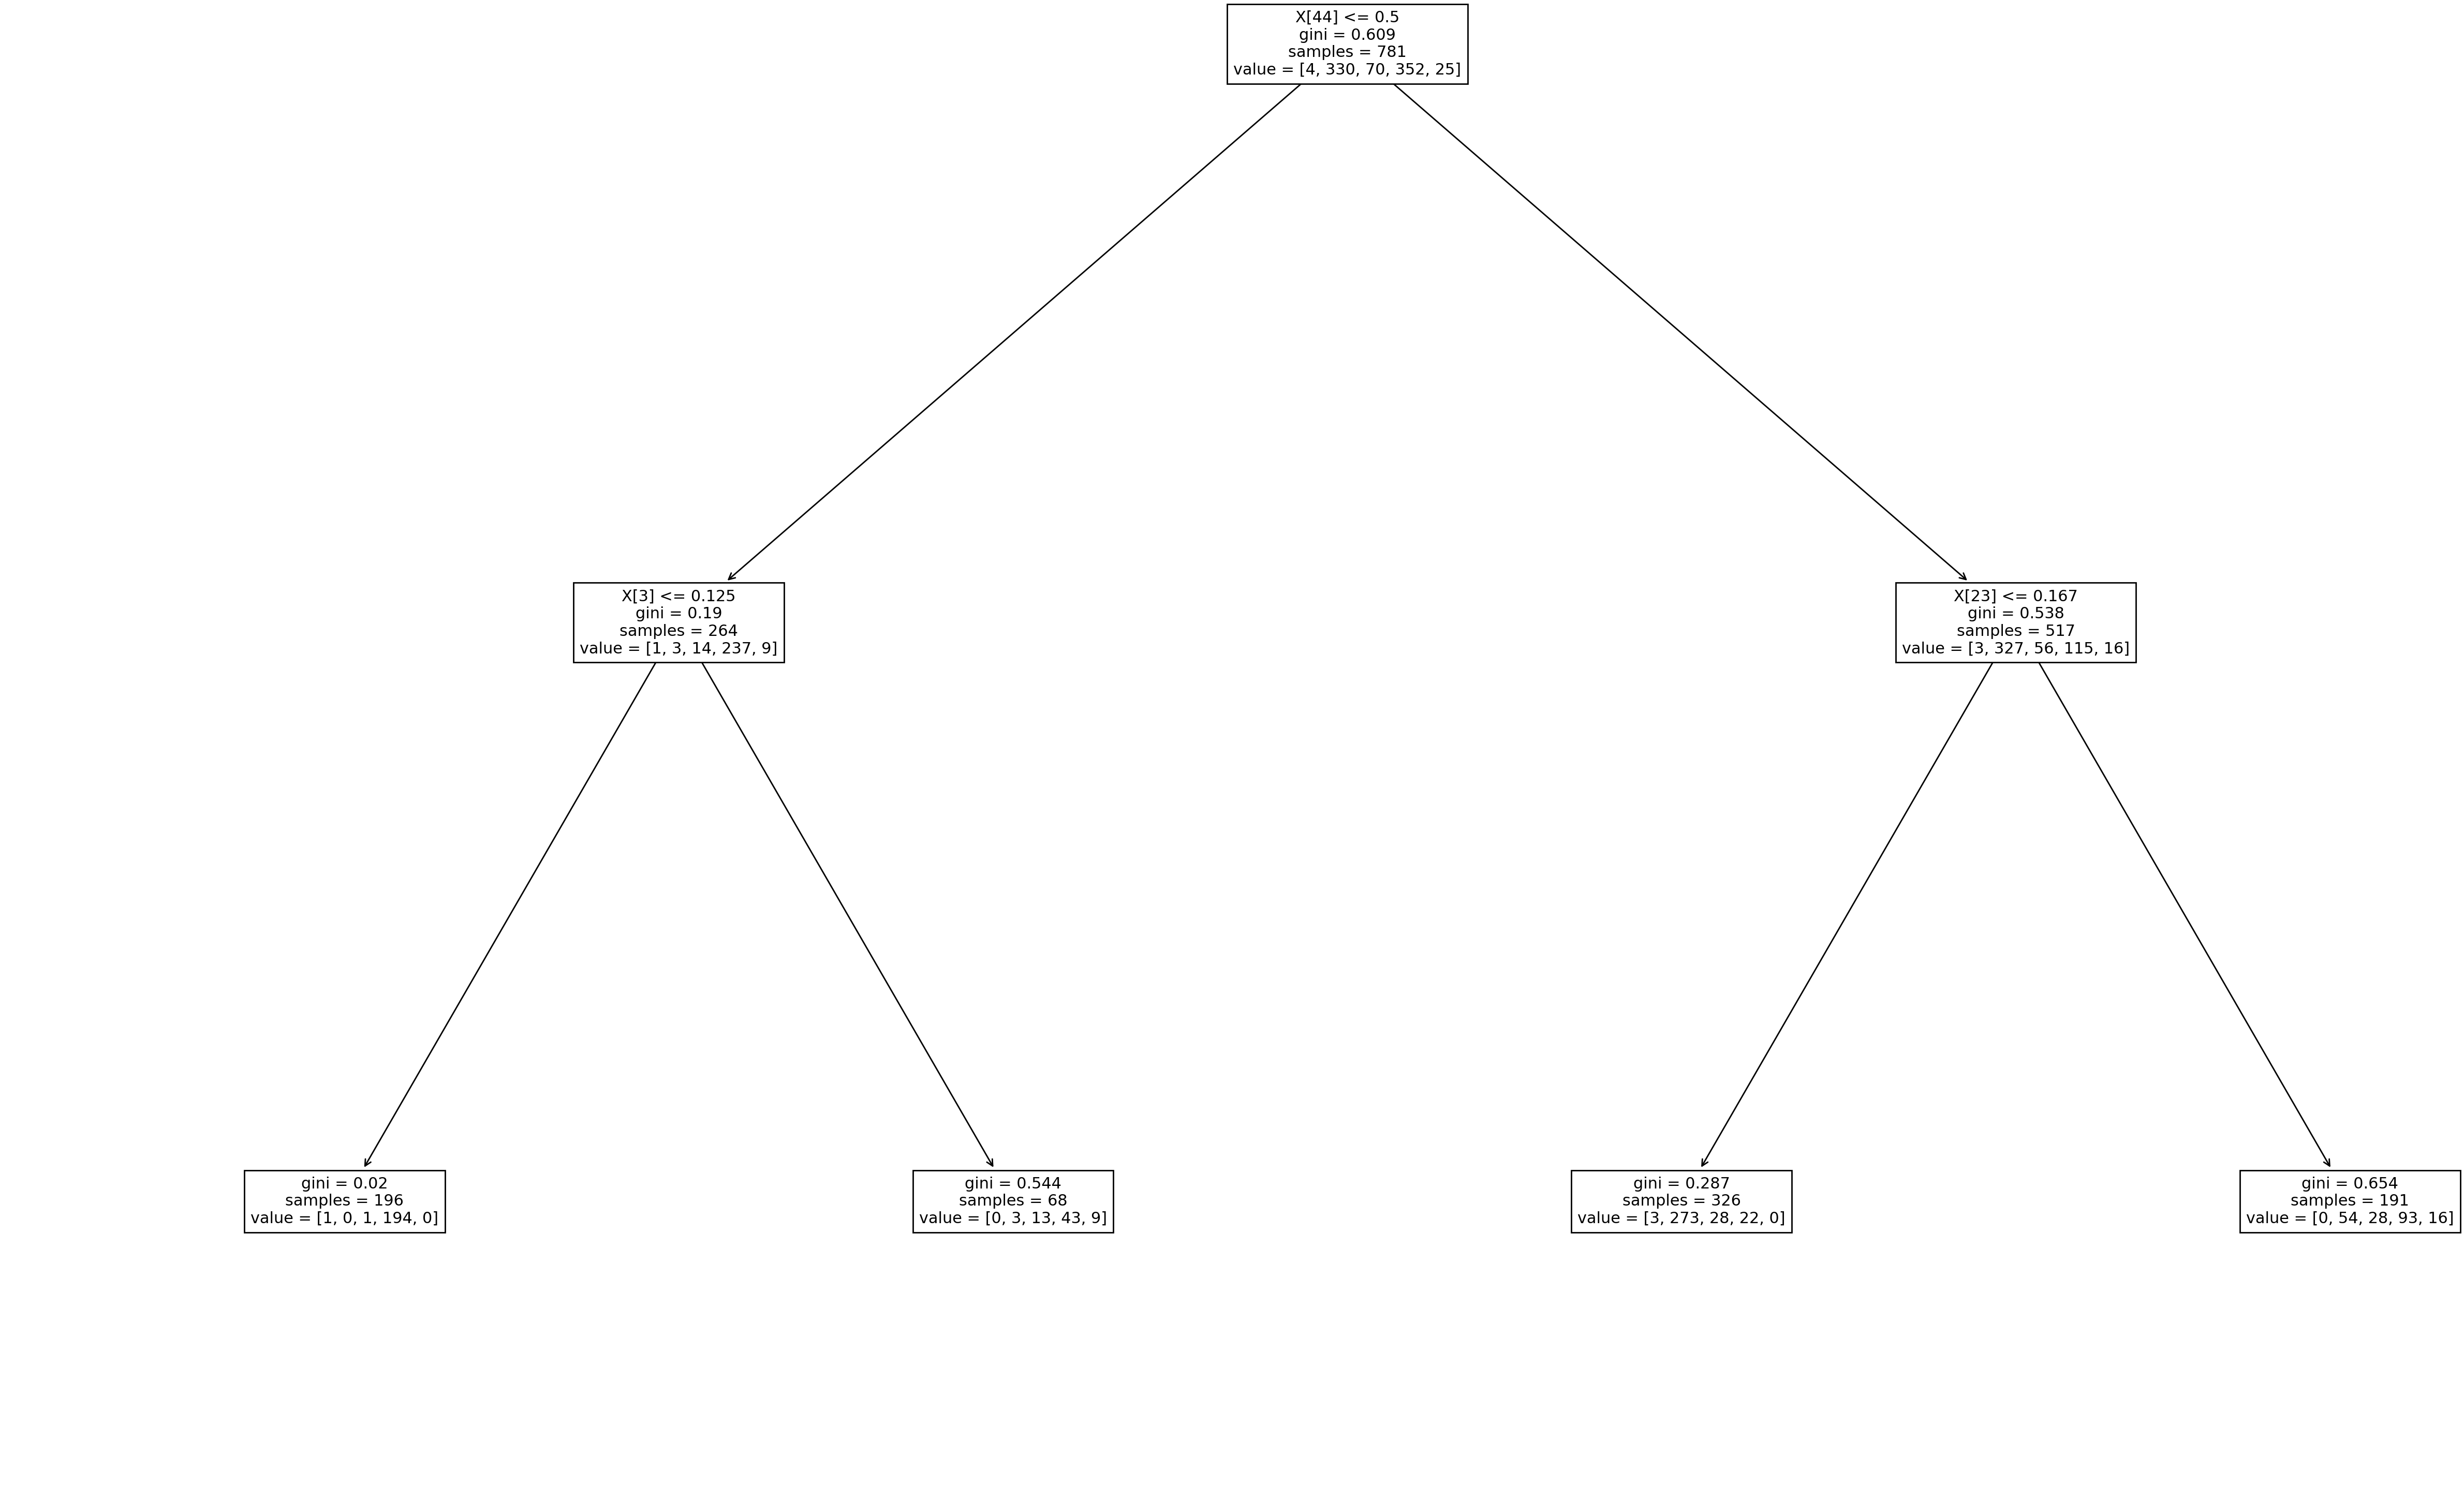

In [57]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(pruned_tree);

In [58]:
pruned_tree_leaves = DecisionTreeClassifier(max_leaf_nodes=3, random_state=786)
pruned_tree_leaves.fit(X_train,y_train)
preds = pruned_tree_leaves.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.89      0.80      0.84       148
           3       0.00      0.00      0.00        29
           4       0.66      0.94      0.78       142
           5       0.00      0.00      0.00        14

    accuracy                           0.75       336
   macro avg       0.31      0.35      0.32       336
weighted avg       0.67      0.75      0.70       336



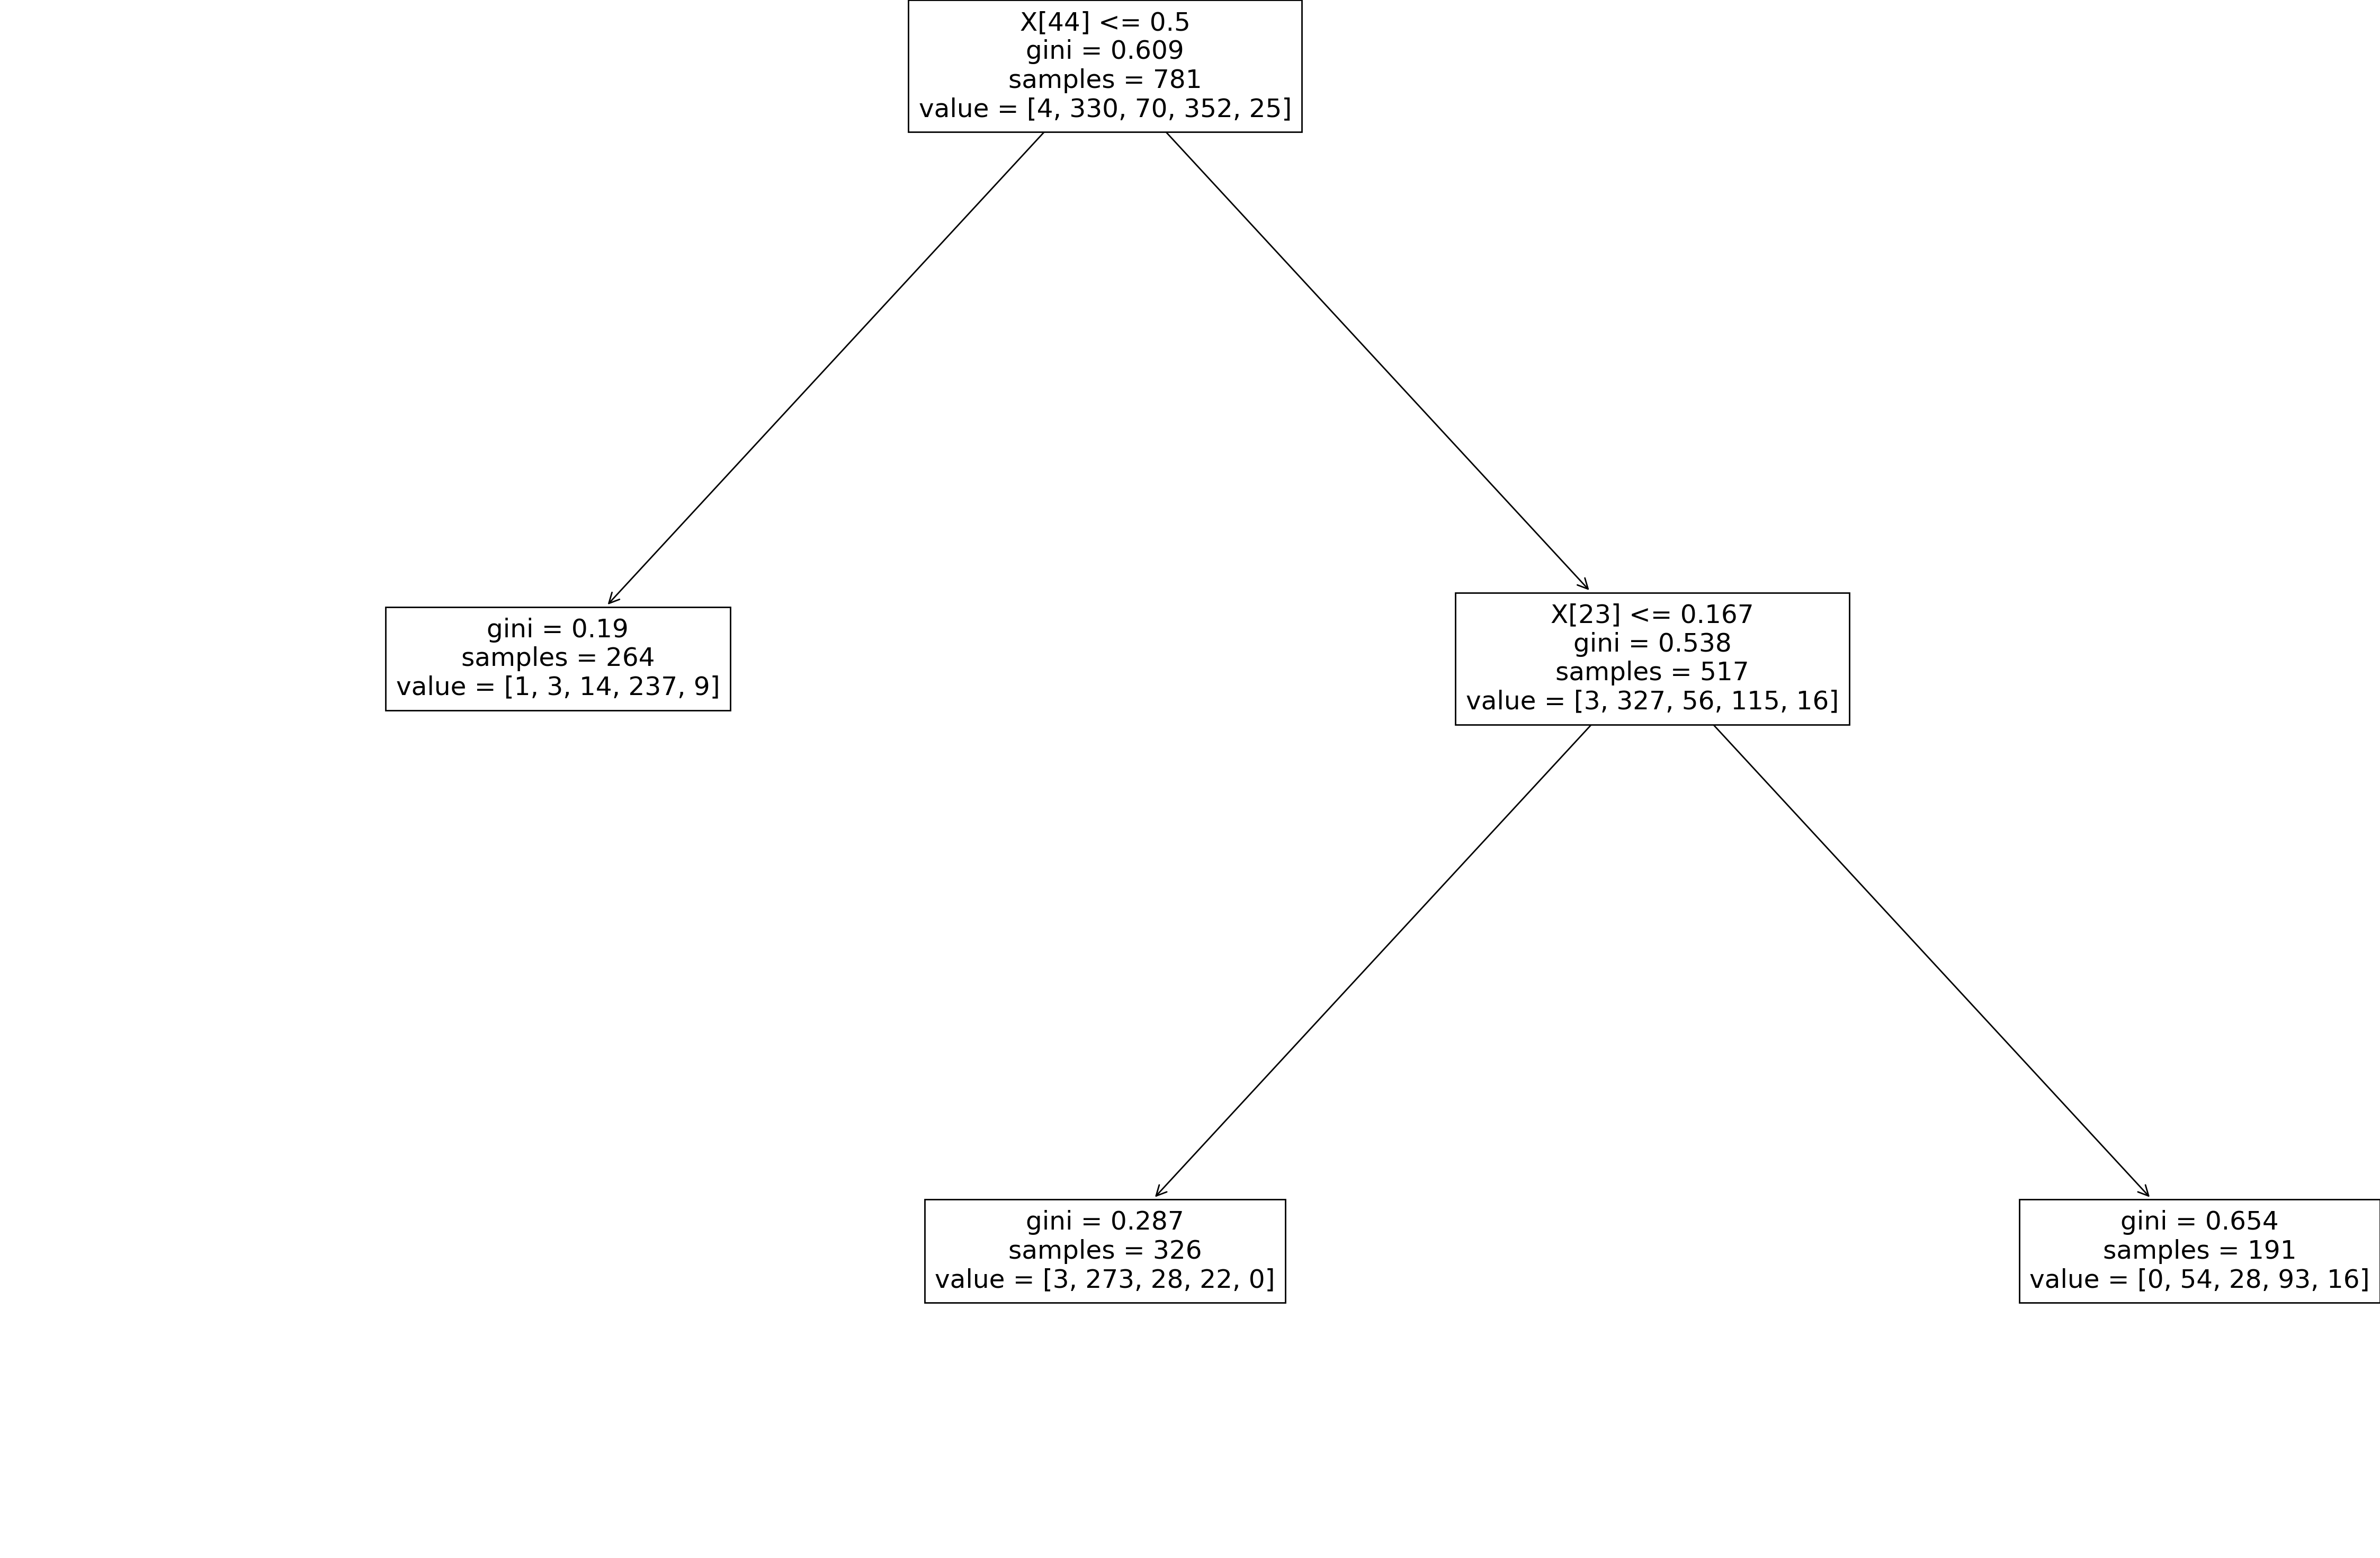

In [59]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(pruned_tree_leaves);

### Decision Tree Classifier with criterion set to 'entropy'

In [60]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=786)
entropy_tree.fit(X_train,y_train)
preds = entropy_tree.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.88      0.83      0.86       148
           3       0.29      0.28      0.28        29
           4       0.73      0.80      0.76       142
           5       0.31      0.29      0.30        14

    accuracy                           0.74       336
   macro avg       0.44      0.44      0.44       336
weighted avg       0.74      0.74      0.74       336



### Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Use 10 random trees initially
rfc = RandomForestClassifier(n_estimators=5,max_features='auto',random_state=786)
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.84      0.94      0.89       148
           3       0.27      0.14      0.18        29
           4       0.83      0.87      0.85       142
           5       0.50      0.21      0.30        14

    accuracy                           0.80       336
   macro avg       0.49      0.43      0.44       336
weighted avg       0.76      0.80      0.78       336



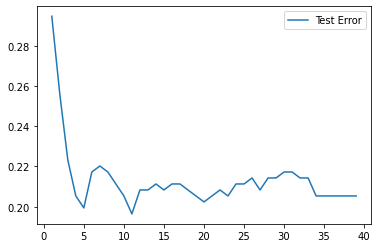

In [62]:
# Choosing correct number of trees

test_error = []

for n in range(1,40):
    # Use n random trees
    rfc = RandomForestClassifier(n_estimators=n,max_features='auto', random_state=786)
    rfc.fit(X_train,y_train)
    test_preds = rfc.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [63]:
# Since RFC has highest accuracy, GridSearchCV is used to seek optimal parameters:

n_estimators=[2,4,7,10,25,40,50,64,100,128,200]
max_features= [2,3,4,5]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

rfc = RandomForestClassifier(random_state=786)
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=786),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [2, 4, 7, 10, 25, 40, 50, 64, 100, 128,
                                          200],
                         'oob_score': [True, False]})

In [64]:
grid.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 50, 'oob_score': False}

In [65]:
preds = grid.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.86      0.92      0.89       148
           3       0.00      0.00      0.00        29
           4       0.75      0.91      0.82       142
           5       0.00      0.00      0.00        14

    accuracy                           0.79       336
   macro avg       0.32      0.37      0.34       336
weighted avg       0.70      0.79      0.74       336



### AdaBoostClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [66]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'n_estimators': np.arange(10,100,10),
              'learning_rate': [0.01, 0.05, 0.1, 1]}
abc = AdaBoostClassifier(random_state=786)
grid = GridSearchCV(abc,param_grid,cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=786),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [67]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 20}

In [68]:
preds = grid.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.63      0.95      0.76       148
           3       0.00      0.00      0.00        29
           4       0.87      0.69      0.77       142
           5       0.00      0.00      0.00        14

    accuracy                           0.71       336
   macro avg       0.30      0.33      0.31       336
weighted avg       0.65      0.71      0.66       336



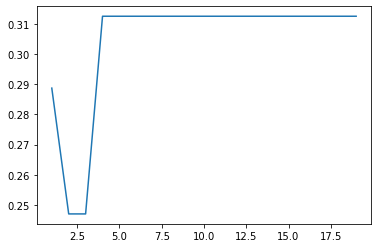

In [69]:
error_rates = []

for n in range(1,20): 
    model = AdaBoostClassifier(n_estimators=n, random_state=786)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)
    
plt.plot(range(1,20),error_rates)

### GradientBoostingClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[2,3,4,5,6]}
gbc = GradientBoostingClassifier(random_state=786)
grid = GridSearchCV(gbc,param_grid,cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=786),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [71]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 1}

In [72]:
preds = grid.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.88      0.91      0.89       148
           3       0.00      0.00      0.00        29
           4       0.74      0.94      0.83       142
           5       0.00      0.00      0.00        14

    accuracy                           0.80       336
   macro avg       0.32      0.37      0.34       336
weighted avg       0.70      0.80      0.74       336



In [73]:
feat_import = grid.best_estimator_.feature_importances_

important_X = pd.DataFrame(index=X_train.columns, data=feat_import, 
                              columns=['Feature Importance'])
important_X = important_X.sort_values(by='Feature Importance', ascending=False)
important_X = important_X[important_X['Feature Importance'] > 0]
important_X

,Feature Importance
"Other than family, who do you go to when you have a problem?_Block Majhi",0.373033
To what extent do you feel at home in the camp in Bangladesh now?,0.346728
How satisfied are you with the level of social support you and your family receive from neighbours and friends?,0.121291
Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?_No,0.050930
How satisfied are you with the level of psychological support you and your family are receiving in the camp?,0.023207
Do you think that the government of Myanmar will recognize the rights of Rohingya in the next two years?_Yes,0.015886
How do you think violence in the camp has changed over time?,0.010643
Do you consider any Bangladeshis as your friends?_Yes,0.010596
Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?_No,0.008692
Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?_Yes,0.006488
